# Segmenting and Clustering Neighborhoods in Toronto

##### by Luca Mancino 

In this notebook, I will explore, segment, and cluster the neighborhoods in the city of Toronto. Unlike NYC, the neighborhood data in not readily available on the web. For the purpose, I will use a Wikipedia page containing all the information needed to explore and cluster the neighborhoods in Toronto.

**INSTRUCTIONS**:
    1) run '**pip install wikipedia**' to use the Wikipedia library; 
    2) run '**pip install lxml**'. 
    
These steps are fundamental to create a Pandas dataframe starting from a Wikipedia table. Once the packages have been installed, do not compute them again. 

In [1]:
# To use the Wikipedia library, there is the need to install it. 
from pip._internal import main as _main

package_names=['wikipedia'] #packages to install
_main(['install'] + package_names + ['--upgrade']) 

Requirement already up-to-date: wikipedia in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (1.4.0)


0

In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Start by creating a new Notebook for this assignment.
# setup import
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

In [93]:
import matplotlib.pyplot as plt
import numpy as np 

In [6]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]

# The next line code is used to drop the rows containing 'Not assigned' values in the 'Borough' column
df_1 = df[df.Borough != 'Not assigned']

In [7]:
# Shape of the 'df' dataset (which is not 'cleaned')
df.shape

(180, 3)

In [8]:
# Shape of the 'df_1' dataset obtained by dropping out the rows containing 'Not assigned' values in the 'Borough' colums
df_1.shape

(103, 3)

Note that more than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma. I will call df_2 the new dataset.

In [9]:
df_2=df_1.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [10]:
df_2.iterrows()

<generator object DataFrame.iterrows at 0x7fedf4e95518>

In [11]:
for index, row in df_2.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

In [12]:
df_2

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...


In [13]:
# Shape of the 'df_2' dataset 
df_2.shape

(103, 3)

In what follows, we use some geospatial data (http://cocl.us/Geospatial_data) to merge the geographical coordinates of the neighborhoods in the 'df_2' dataset. For the purpose, we import 'requests' and 'io' as shown here:

In [14]:
import requests
import io

In [15]:
geo_url="http://cocl.us/Geospatial_data" # url address
requests_geo_url=requests.get(geo_url).content # request

In [16]:
# df_PC_L_L is a dataset with 'Postal Code', 'Latitude', and 'Longitude' as columns
df_PC_L_L=pd.read_csv(io.StringIO(requests_geo_url.decode('utf-8')))
# We can use the .head() method to print the first five rows of the dataset
df_PC_L_L.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
df_2.columns=['PostalCode', 'Borough', 'Neighborhood'] # From 'Postal Code' to 'PostalCode' as required
df_PC_L_L.columns=['PostalCode', 'Latitude', 'Longitude'] # From 'Postal Code' to 'PostalCode' as required

In [18]:
# We use Pandas to merge the two datasets using 'PostalCode' as reference:
# the two dataset are merged associating the correct 'Latitude' and 'Longitude' to the PostalCode
df_3 = pd.merge(df_2, df_PC_L_L, on='PostalCode')

#### Here, we show the 'http://cocl.us/Geospatial_data' dataset

In [44]:
# We use the .head() method to visualise the first five rows of the df_3 dataset
df_3.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In the 'df_3' dataset, there are many Borough which are Toronto. A simple way to access them consists in using the next lines to highlight the rows of interest.

In [63]:
# This line gives access to a sub-dataset containing only the sub-string Toronto in 'Borough'
sub_df_3=df_3[df_3['Borough'].str.contains("Toronto")] 

In [66]:
# These are the first five rows of the 'sub_df_3' dataset
sub_df_3.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,The Danforth West / Riverdale,43.679557,-79.352188
42,M4L,East Toronto,India Bazaar / The Beaches West,43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [73]:
rows_sub_df_3=sub_df_3.shape[0] # This line returns 39, which is the number of rows (sub_df_3)

In [79]:
Lat_numpy_array=sub_df_3["Latitude"].to_numpy()
Lon_numpy_array=sub_df_3["Longitude"].to_numpy()

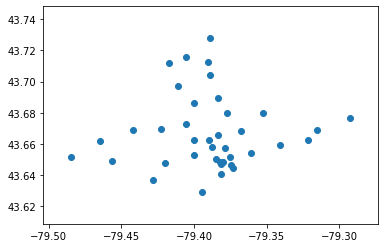

In [112]:
# Scatter plot of longitude (X) and latitude (Y) of the Toronto-like borough
plt.scatter(Lon_numpy_array, Lat_numpy_array)